In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D

In [2]:
DATADIR_Train = 'C:/Users/ADMIN/Documents/Dverse/archive (3)/train'
DATADIR_Test = 'C:/Users/ADMIN/Documents/Dverse/archive (3)/fingers/test'
IMG_SIZE = 128
label_list = ['0L', '1L', '2L', '3L', '4L', '5L', '0R', '1R', '2R', '3R', '4R', '5R']

In [3]:
training_data = []
test_data = []


for train_img in os.listdir(DATADIR_Train):
    label_str = train_img[-5: -7: -1][::-1]
    label = label_list.index(label_str)
    img = cv2.imread(os.path.join(DATADIR_Train, train_img), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    training_data.append([img, label])
    
for test_img in os.listdir(DATADIR_Test):
    label_str = test_img[-5: -7: -1][::-1]
    label = label_list.index(label_str)
    img = cv2.imread(os.path.join(DATADIR_Test, test_img), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    test_data.append([img, label])

In [4]:
print("Training Data :",len(training_data))
print("Test Data :",len(test_data))

Training Data : 18000
Test Data : 3600


0L


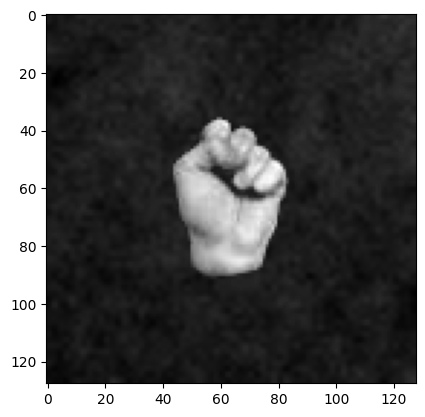

In [6]:
plt.imshow(training_data[0][0], cmap = 'gray')
print(label_list[training_data[0][1]])

5L


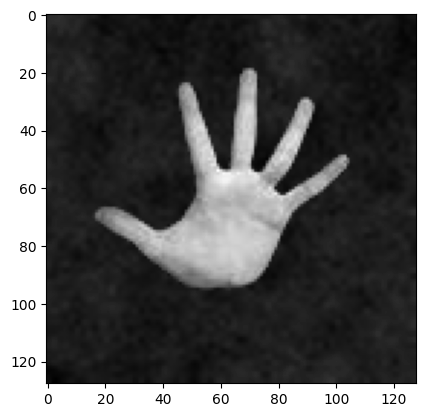

In [7]:
plt.imshow(test_data[0][0], cmap = 'gray')
print(label_list[test_data[0][1]])

In [8]:
training_data[0][0].shape

(128, 128)

In [9]:
random.shuffle(training_data)
random.shuffle(test_data)

In [10]:
x_train = []
y_train = []
x_test = []
y_test = []

for feature, label in training_data:
    x_train.append(feature)
    y_train.append(label)
    
for feature, label in test_data:
    x_test.append(feature)
    y_test.append(label)

In [11]:
print("x_train : ", len(x_train))
print("y_train : ", len(y_train))
print("x_test : ", len(x_test))
print("y_test : ", len(y_test))

x_train :  18000
y_train :  18000
x_test :  3600
y_test :  3600


In [12]:
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [13]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [14]:
x_train = x_train/255.0
x_test = x_test/255.0

In [27]:
model = Sequential()

# First Layer
model.add(   Conv2D(64,  (3, 3), input_shape = x_train.shape[1:])   )
model.add( Activation('relu') )
model.add( MaxPool2D(pool_size = (2,2)) )

# Second Layer
model.add(   Conv2D(64,  (3, 3))   )
model.add( Activation('relu') )
model.add( MaxPool2D(pool_size = (2,2)) )

# Third Layer
model.add(Flatten())
model.add(Dense(64))
model.add( Activation('relu') )

# Output Layer
model.add(Dense(12))
model.add(Activation('sigmoid'))

In [29]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'RMSprop',
             metrics = ['accuracy'])

In [30]:
model.fit(x_train, y_train, batch_size = 32, epochs=3, validation_data = (x_test, y_test))

Epoch 1/3
563/563 [==============================] - 175s 310ms/step - loss: 0.1980 - accuracy: 0.9424 - val_loss: 9.5087e-04 - val_accuracy: 1.0000
Epoch 2/3
563/563 [==============================] - 170s 301ms/step - loss: 5.2031e-04 - accuracy: 0.9999 - val_loss: 5.5570e-05 - val_accuracy: 1.0000
Epoch 3/3
563/563 [==============================] - 172s 305ms/step - loss: 4.1253e-06 - accuracy: 1.0000 - val_loss: 5.6562e-05 - val_accuracy: 1.0000


In [31]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)


report = classification_report(y_test, y_pred_classes, target_names=label_list)

print("Classification Report:")
print(report)

113/113 [==============================] - 9s 78ms/step
Classification Report:
              precision    recall  f1-score   support

          0L       0.64      1.00      0.78       300
          1L       0.99      1.00      0.99       300
          2L       0.98      0.99      0.98       300
          3L       0.54      0.98      0.70       300
          4L       1.00      1.00      1.00       300
          5L       1.00      1.00      1.00       300
          0R       1.00      0.44      0.61       300
          1R       1.00      1.00      1.00       300
          2R       0.79      1.00      0.88       300
          3R       0.96      0.73      0.83       300
          4R       0.88      0.90      0.89       300
          5R       1.00      0.11      0.20       300

    accuracy                           0.85      3600
   macro avg       0.90      0.85      0.82      3600
weighted avg       0.90      0.85      0.82      3600



In [32]:
model.save('Fingers_Detection_CNN_Tensorflow_Keras.model')

INFO:tensorflow:Assets written to: Fingers_Detection_CNN_Tensorflow_Keras.model\assets


INFO:tensorflow:Assets written to: Fingers_Detection_CNN_Tensorflow_Keras.model\assets
